# Dataset 1 - Amazon Sales Dataset
| Variable             | Definition                                             |
|----------------------|--------------------------------------------------------|
| product_id           | Product ID                                             |
| product_name         | Name of the Product                                     |
| category             | Category of the Product                                 |
| discounted_price     | Discounted Price of the Product                         |
| actual_price         | Actual Price of the Product                             |
| discount_percentage  | Percentage of Discount for the Product                  |
| rating               | Rating of the Product                                   |
| rating_count         | Number of people who voted for the Amazon rating         |
| about_product        | Description about the Product                           |
| user_id              | ID of the user who wrote review for the Product          |
| user_name            | Name of the user who wrote review for the Product        |
| review_id            | ID of the user review                                   |
| review_title         | Short review                                            |
| review_content       | Long review                                             |
| img_link             | Image Link of the Product                               |
| product_link         | Official Website Link of the Product                    |

## Models:
1. Linear Regression (predicting the percentage of discounts based on the features)
2. Random Forest Regressor (predicting the percentage of discounts based on the features)

## Business Analysis:
* From a customer's perspective, provide a prediction of the product discount based on the product categories and customer ratings.

# Data analysis

In [85]:
import pandas as pd
import numpy  as np
import re
import matplotlib.pyplot as plt

In [86]:
url = 'https://raw.githubusercontent.com/fabricio-inoue/Amazon-Sales-Regression/main/amazon.csv'
df_amazon = pd.read_csv(url)
df_amazon.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [87]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

# Conversion functions

In [88]:
import re

def remove_symbol(df, column, symbol):
    pattern = re.compile(re.escape(symbol))  # Define the search pattern as the specified symbol
    df[column] = df[column].apply(lambda x: re.sub(pattern, '', str(x)))  # Remove the symbol from the column
    df[column] = df[column].str.replace(',', '')  # Remove commas from the values
    df[column] = df[column].apply(lambda x: float(x) if re.match(r'^-?\d+(?:\.\d+)?$', x) else x)  # Convert only the numeric values to float
    return df


remove_symbol(df_amazon, 'discounted_price', '₹')
remove_symbol(df_amazon, 'discounted_price', ',')
remove_symbol(df_amazon, 'actual_price', '₹')
remove_symbol(df_amazon, 'actual_price', ',')
remove_symbol(df_amazon, 'rating_count', ',')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64%,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43%,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90%,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53%,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61%,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59%,4,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25%,4.1,4118.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri

In [89]:
from forex_python.converter import CurrencyRates

def convert_rupee_to_usd(df, column):
    c = CurrencyRates()
    exchange_rate = c.get_rate('INR', 'USD')  # Get the exchange rate between Indian Rupee (INR) and US Dollar (USD)
    df[column] = df[column].apply(lambda x: x * exchange_rate)  # Convert rupee values to dollar using the exchange rate
    df[column] = df[column].apply(lambda x: round(x, 2))
    return df

# Function calls
convert_rupee_to_usd(df_amazon, 'discounted_price')
convert_rupee_to_usd(df_amazon, 'actual_price')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.88,13.45,64%,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,2.44,4.27,43%,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,2.44,23.24,90%,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.03,8.55,53%,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,1.88,4.88,61%,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,4.64,11.25,59%,4,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,27.90,37.26,25%,4.1,4118.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://

In [90]:
def convert_percentage_to_float(df, column):
    remove_symbol(df, column, '%')  # Remove the '%' symbol from the column
    df[column] = df[column].astype(float) / 100  # Convert the values to float and divide by 100
    return df

convert_percentage_to_float(df_amazon, 'discount_percentage')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.88,13.45,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,2.44,4.27,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,2.44,23.24,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.03,8.55,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,1.88,4.88,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,4.64,11.25,0.59,4,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,27.90,37.26,0.25,4.1,4118.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",h

In [91]:
print(df_amazon['rating'].unique())

['4.2' '4.0' '3.9' '4.1' '4.3' '4.4' '4.5' '3.7' '3.3' '3.6' '3.4' '3.8'
 '3.5' '4.6' '3.2' '5.0' '4.7' '3.0' '2.8' '4' '3.1' '4.8' '2.3' '|' '2'
 '3' '2.6' '2.9']


In [92]:
df_amazon['rating'] = df_amazon['rating'].replace('|', '0').astype(float)

df_amazon['rating_count'] = df_amazon['rating_count'].astype(float)

# Separating by category

In [93]:
df_amazon['category'].value_counts()

Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                                          233
Electronics|WearableTechnology|SmartWatches                                                                                 76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                                        68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                                               63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                                                                52
                                                                                                                          ... 
Electronics|Cameras&Photography|Accessories|Batteries&Chargers|BatteryChargers                                               1
Computers&Accessories|NetworkingDevices|DataCards&Dongles                                                      

In [94]:
df_amazon['category'] = df_amazon['category'].str.split('|').str.get(0) + '|' + df_amazon['category'].str.split('|').str.get(1)

In [95]:
df_amazon['category'].value_counts()

Computers&Accessories|Accessories&Peripherals          381
Home&Kitchen|Kitchen&HomeAppliances                    308
Electronics|HomeTheater,TV&Video                       162
Electronics|Mobiles&Accessories                        161
Home&Kitchen|Heating,Cooling&AirQuality                116
Electronics|WearableTechnology                          76
Electronics|Headphones,Earbuds&Accessories              66
Computers&Accessories|NetworkingDevices                 34
OfficeProducts|OfficePaperProducts                      27
Computers&Accessories|ExternalDevices&DataStorage       18
Electronics|Cameras&Photography                         16
Home&Kitchen|HomeStorage&Organization                   16
Electronics|HomeAudio                                   16
Electronics|GeneralPurposeBatteries&BatteryChargers     14
Electronics|Accessories                                 14
Computers&Accessories|Printers,Inks&Accessories         11
Home&Kitchen|CraftMaterials                             

In [96]:
# Indexing the dataframe by the 'category' column

category_counts = df_amazon['category'].value_counts()
valid_categories = category_counts[category_counts >= 30].index
df_amazon = df_amazon[df_amazon['category'].isin(valid_categories)]

In [97]:
df_amazon['category'].value_counts()

Computers&Accessories|Accessories&Peripherals    381
Home&Kitchen|Kitchen&HomeAppliances              308
Electronics|HomeTheater,TV&Video                 162
Electronics|Mobiles&Accessories                  161
Home&Kitchen|Heating,Cooling&AirQuality          116
Electronics|WearableTechnology                    76
Electronics|Headphones,Earbuds&Accessories        66
Computers&Accessories|NetworkingDevices           34
Name: category, dtype: int64

In [98]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1304 non-null   object 
 1   product_name         1304 non-null   object 
 2   category             1304 non-null   object 
 3   discounted_price     1304 non-null   float64
 4   actual_price         1304 non-null   float64
 5   discount_percentage  1304 non-null   float64
 6   rating               1304 non-null   float64
 7   rating_count         1302 non-null   float64
 8   about_product        1304 non-null   object 
 9   user_id              1304 non-null   object 
 10  user_name            1304 non-null   object 
 11  review_id            1304 non-null   object 
 12  review_title         1304 non-null   object 
 13  review_content       1304 non-null   object 
 14  img_link             1304 non-null   object 
 15  product_link         1304 non-null   o

In [99]:
df_amazon.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1304.000000,1304.000000,1304.000000,1304.000000,1302.000000
mean,40.677224,70.849433,0.492270,4.078988,17552.299539
std,88.197798,137.760324,0.207501,0.315431,42690.039673
min,0.480000,0.480000,0.000000,0.000000,2.000000
25%,4.070000,12.080000,0.350000,3.900000,1066.250000
50%,11.000000,22.010000,0.500000,4.100000,4863.000000
75%,26.345000,61.075000,0.640000,4.300000,16557.000000
max,954.340000,1711.910000,0.940000,5.000000,426973.000000


# Data Visualization

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df_num = df_amazon[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']]

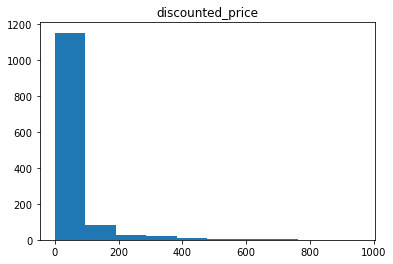

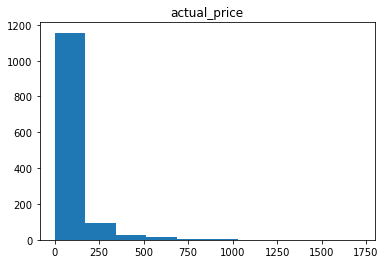

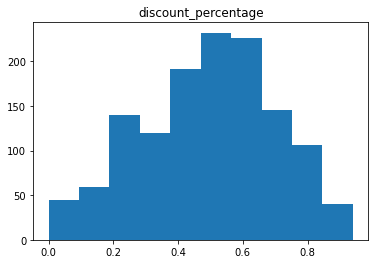

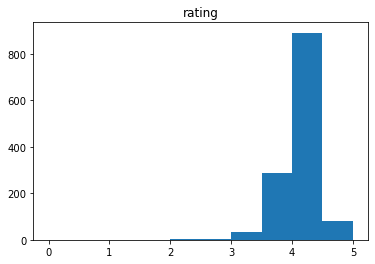

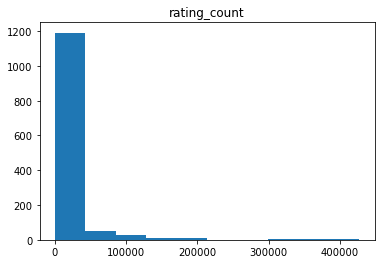

In [102]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

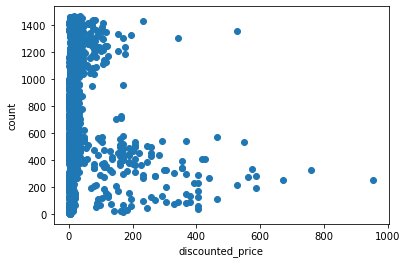

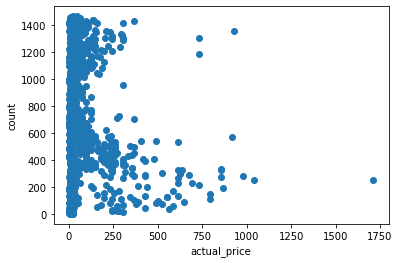

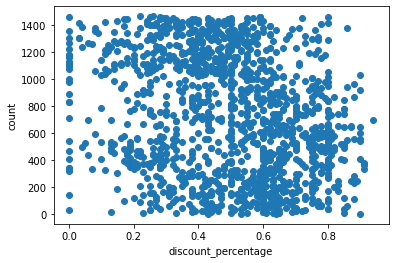

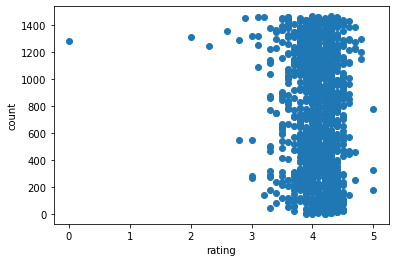

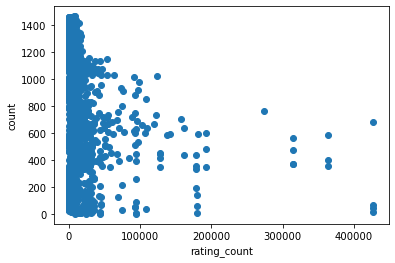

In [103]:
for column in df_num.columns:
    plt.scatter(df_num[column], df_num.index)
    plt.xlabel(column)
    plt.ylabel('count')
    plt.show()

In [104]:
missing_values_count = df_amazon.isnull().sum()
missing_values_count

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

                     discounted_price  actual_price  discount_percentage  \
discounted_price             1.000000      0.961483            -0.293433   
actual_price                 0.961483      1.000000            -0.165067   
discount_percentage         -0.293433     -0.165067             1.000000   
rating                       0.134640      0.138352            -0.098527   
rating_count                -0.022313     -0.033089            -0.015819   

                       rating  rating_count  
discounted_price     0.134640     -0.022313  
actual_price         0.138352     -0.033089  
discount_percentage -0.098527     -0.015819  
rating               1.000000      0.089196  
rating_count         0.089196      1.000000  


<AxesSubplot:>

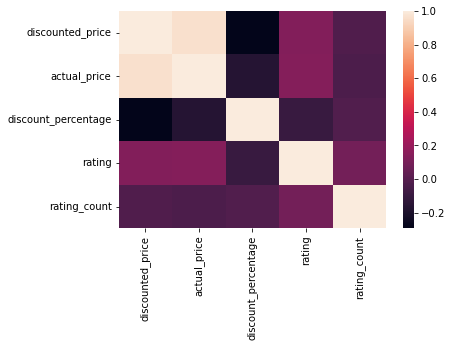

In [105]:
print(df_num.corr(method='pearson'))
sns.heatmap(df_num.corr())

                     discounted_price  actual_price  discount_percentage  \
discounted_price             1.000000      0.933924            -0.476438   
actual_price                 0.933924      1.000000            -0.178224   
discount_percentage         -0.476438     -0.178224             1.000000   
rating                       0.124569      0.090009            -0.107096   
rating_count                 0.130134      0.100439            -0.111184   

                       rating  rating_count  
discounted_price     0.124569      0.130134  
actual_price         0.090009      0.100439  
discount_percentage -0.107096     -0.111184  
rating               1.000000      0.167707  
rating_count         0.167707      1.000000  


<AxesSubplot:>

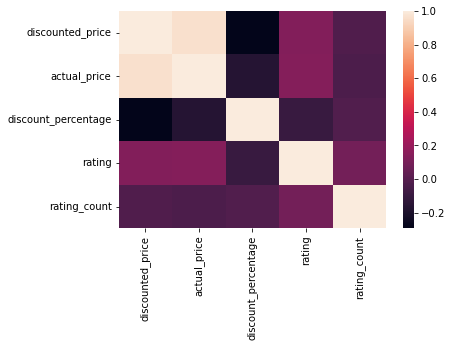

In [106]:
print(df_num.corr(method='spearman'))
sns.heatmap(df_num.corr())

* Data leakage can be found in discounted_price and actual_price columns.

# Data processing and modeling

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [108]:
variables = ['rating', 'rating_count']

In [109]:
X = df_amazon[variables]
y = df_amazon['discount_percentage']

X = X.fillna(-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Category: Computers&Accessories|Accessories&Peripherals


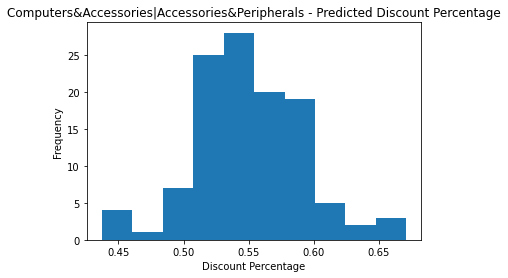

Mean Squared Error: 0.029611584570895137
R-squared: -0.001523377900227496
Mean Discount Percentage (Predicted): 0.5490704270615218

Category: Computers&Accessories|NetworkingDevices


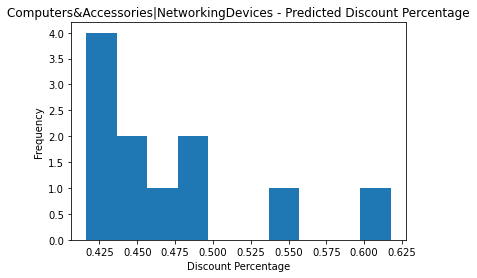

Mean Squared Error: 0.021460357069716385
R-squared: -0.4802777365384121
Mean Discount Percentage (Predicted): 0.474129653336268

Category: Electronics|Headphones,Earbuds&Accessories


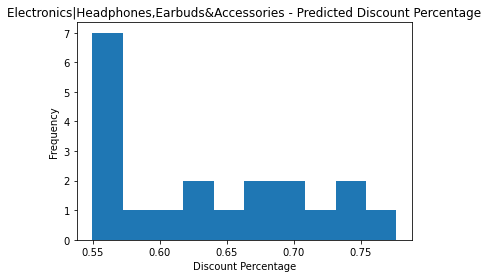

Mean Squared Error: 0.04631594471892942
R-squared: -0.08354697872673089
Mean Discount Percentage (Predicted): 0.6378350225592089

Category: Electronics|HomeTheater,TV&Video


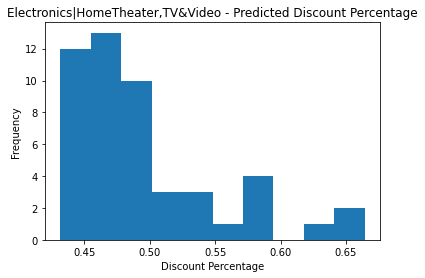

Mean Squared Error: 0.02074435821405136
R-squared: -0.08133136649089923
Mean Discount Percentage (Predicted): 0.4951494254924909

Category: Electronics|Mobiles&Accessories


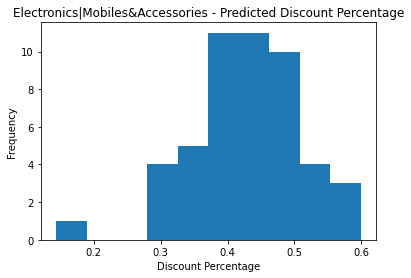

Mean Squared Error: 0.056138459644326726
R-squared: 0.036747919282641095
Mean Discount Percentage (Predicted): 0.42658172190024074

Category: Electronics|WearableTechnology


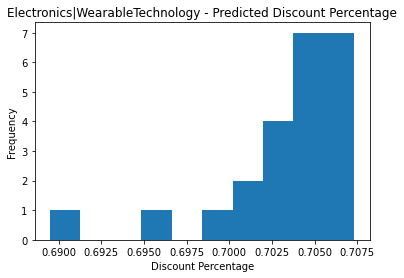

Mean Squared Error: 0.01609402930051787
R-squared: -0.019805172245454417
Mean Discount Percentage (Predicted): 0.7033113211586285

Category: Home&Kitchen|Heating,Cooling&AirQuality


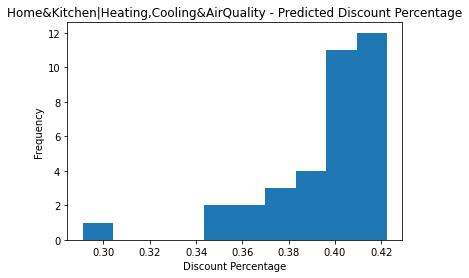

Mean Squared Error: 0.017256784861563734
R-squared: 0.0594858005474328
Mean Discount Percentage (Predicted): 0.39544904376447715

Category: Home&Kitchen|Kitchen&HomeAppliances


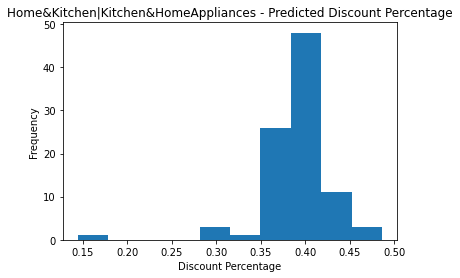

Mean Squared Error: 0.03902282919908387
R-squared: 0.04982173766818754
Mean Discount Percentage (Predicted): 0.39055588586892787



In [110]:
# Group the dataframe by 'category'
grouped_df = df_amazon.groupby('category')

# Iterate over each category
for category, group in grouped_df:
    group.dropna(subset=['discount_percentage', 'rating', 'rating_count'], inplace=True)
    X = group[['rating', 'rating_count']]
    y = group['discount_percentage']

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # Create an instance of Linear Regression
    model = LinearRegression()

    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Print the category
    print("Category:", category)

    # Plot the histogram of predicted discount percentages
    plt.hist(y_pred)
    plt.title(f"{category} - Predicted Discount Percentage")
    plt.xlabel("Discount Percentage")
    plt.ylabel("Frequency")
    plt.show()

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

    # Calculate the mean of discount_percentage
    mean_discount_percentage = y_pred.mean()
    print("Mean Discount Percentage (Predicted):", mean_discount_percentage)
    print()

Category: Computers&Accessories|Accessories&Peripherals


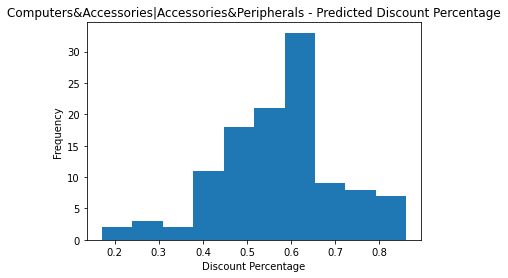

Mean Discount Percentage (Predicted): 0.5720290477456268

Category: Computers&Accessories|NetworkingDevices


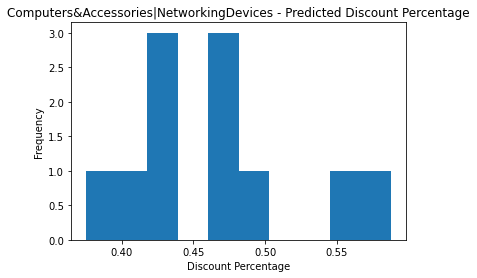

Mean Discount Percentage (Predicted): 0.4675838961038961

Category: Electronics|Headphones,Earbuds&Accessories


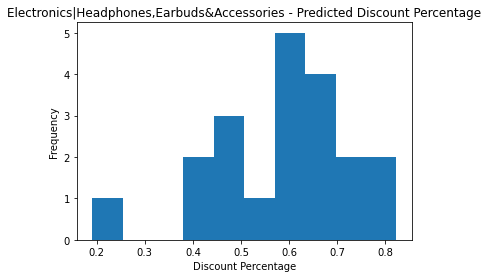

Mean Discount Percentage (Predicted): 0.5880712499999999

Category: Electronics|HomeTheater,TV&Video


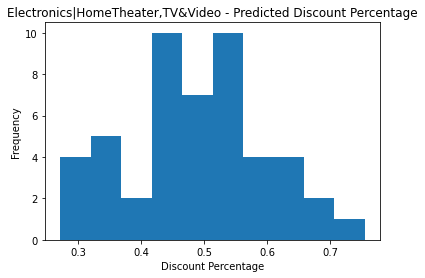

Mean Discount Percentage (Predicted): 0.4863303190800129

Category: Electronics|Mobiles&Accessories


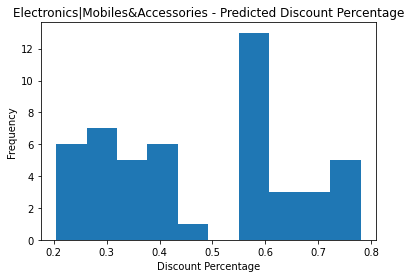

Mean Discount Percentage (Predicted): 0.4760016974975138

Category: Electronics|WearableTechnology


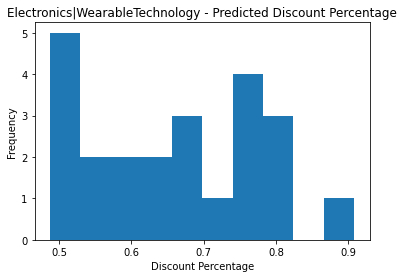

Mean Discount Percentage (Predicted): 0.6566174637681158

Category: Home&Kitchen|Heating,Cooling&AirQuality


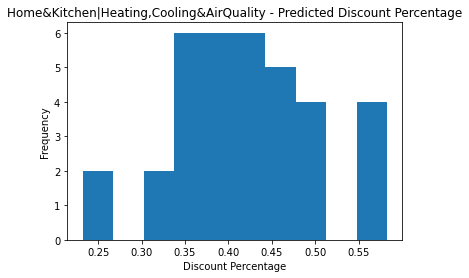

Mean Discount Percentage (Predicted): 0.4207171428571428

Category: Home&Kitchen|Kitchen&HomeAppliances


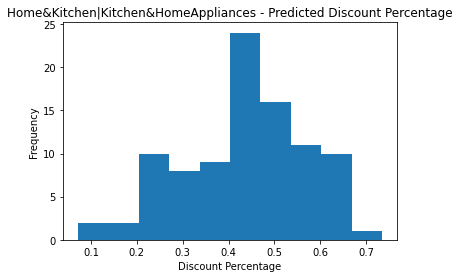

Mean Discount Percentage (Predicted): 0.4394636815156171



In [111]:
# Group the dataframe by 'category'
grouped_df = df_amazon.groupby('category')

# Iterate over each category
for category, group in grouped_df:
    group.dropna(subset=['discount_percentage', 'rating', 'rating_count'], inplace=True)
    X = group[['rating', 'rating_count']]
    y = group['discount_percentage']

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # Create an instance of Random Forest Regressor
    model = RandomForestRegressor()

    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Print the category
    print("Category:", category)

    # Plot the histogram of predicted discount percentages
    plt.hist(y_pred)
    plt.title(f"{category} - Predicted Discount Percentage")
    plt.xlabel("Discount Percentage")
    plt.ylabel("Frequency")
    plt.show()

    # Calculate the mean of discount_percentage
    mean_discount_percentage = y_pred.mean()
    print("Mean Discount Percentage (Predicted):", mean_discount_percentage)
    print()
